In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [11]:
def show_points_and_line(points, m, b):
    min_x, max_x = points[0, 0], points[0, 0]
    for point in points:
        plt.plot(point[0], point[1], 'o', color='green')
        if min_x>point[0]:
            min_x=point[0]
        elif max_x<point[0]:
            max_x=point[0]
    plt.plot([min_x, max_x], [(m*min_x+b), (m*max_x+b)], color='red')
    plt.gca().set(xlabel="Volume", ylabel="Average price", title='Volume VS Price')
    plt.legend(['Avocado'])
    plt.show()

In [3]:
# GET Data
points = np.genfromtxt('avocado.csv', delimiter=',', max_rows=800)
point_temp = []
for point in points:
    #  Volume and AveragePrice
    point_temp.append([point[3]/1000000, point[2]])
point_temp.pop(0)
points = np.array(point_temp) 
x, y = zip(*points)
x = np.array(x).reshape(-1, 1)
y = np.array(y)

In [5]:
# Main Training
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
m = regr.coef_[0]
b = regr.intercept_
print(f'm = {m} and b = {b}')
print('error :',np.mean((regr.predict(x) - y) ** 2))

m = -0.023138841151276762 and b = 1.1021494380282106
error : 0.022992540762677684


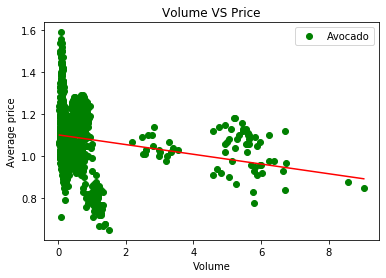

In [12]:
show_points_and_line(points, m, b)